<a href="https://colab.research.google.com/github/Pavan0-18/Design_project/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

# Define paths for training and testing data
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Set image size, batch size, and epochs
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 50

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=40,         # Randomly rotate images
    width_shift_range=0.2,     # Shift images horizontally
    height_shift_range=0.2,    # Shift images vertically
    shear_range=0.2,           # Shear the image
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest'        # Fill in pixels after transformations
)

# Rescale test images (but no augmentation for testing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',   # Use categorical since we have multiple classes
    shuffle=True                # Shuffle training data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Build the CNN Model
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer (6 classes: fresh apples, fresh bananas, fresh oranges, rotten apples, rotten bananas, rotten oranges)
model.add(layers.Dense(6, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model for future use
model.save('fruit_classification_model.h5')


hjvjhvcz


In [2]:
apples="/content/Apples"
print(len(apples))

15


In [3]:
apples.head()


AttributeError: 'str' object has no attribute 'head'

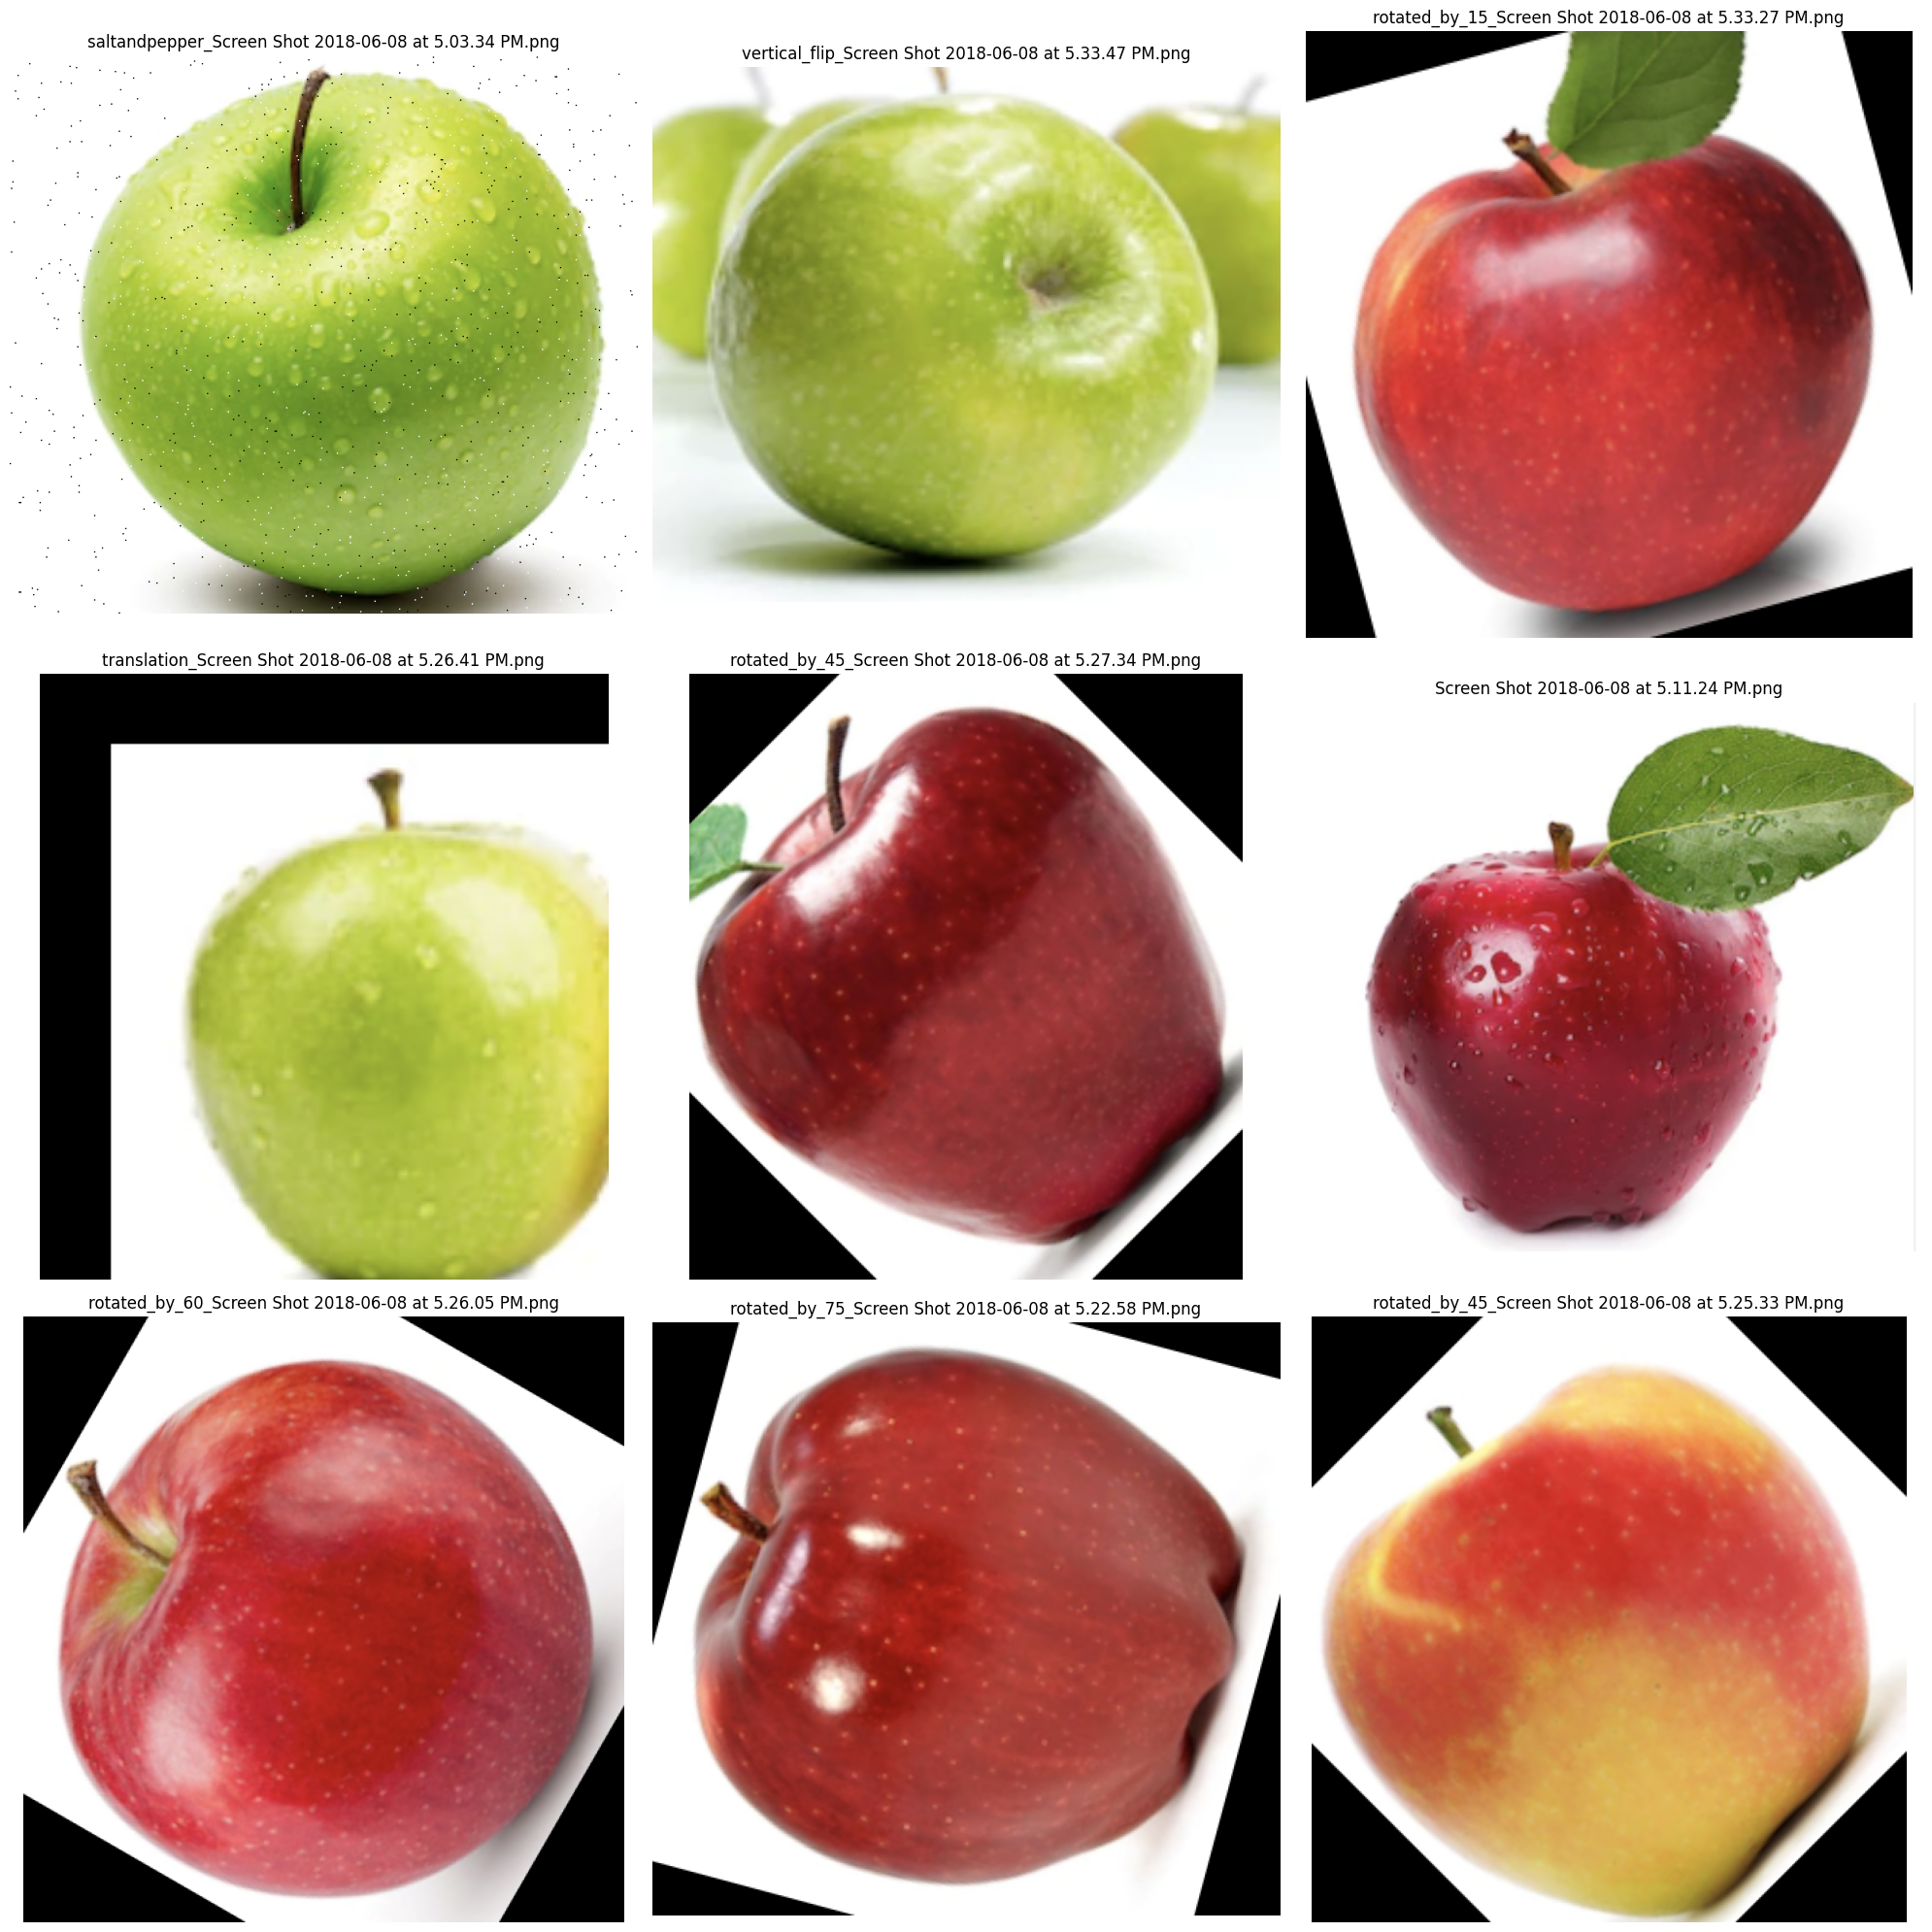

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define the path to the dataset
train_dir = '/content/Apples'

# Get all image files directly in train_dir
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Function to load and display images
def display_images_from_directory(train_dir, image_files, num_images=9):
    plt.figure(figsize=(20, 20))
    image_count = 0

    for image_name in image_files[:num_images]:
        image_path = os.path.join(train_dir, image_name)

        # Open image using PIL
        img = Image.open(image_path)

        # Convert image to array and plot it
        plt.subplot(3, 3, image_count + 1)
        plt.imshow(img)
        plt.title(image_name) # Use image name as title
        plt.axis('off')

        image_count += 1
        if image_count == num_images:
            break

    plt.tight_layout()
    plt.show()

# Display sample images from the training directory
display_images_from_directory(train_dir, image_files)

In [8]:
import numpy as np  # Import NumPy

# Get the length of the list
num_files = len(image_files)
print(f"Number of files: {num_files}")

# If you need shape information, convert to a NumPy array first
image_files_array = np.array(image_files)
print(f"Shape of the NumPy array: {image_files_array.shape}")

Number of files: 1693
Shape of the NumPy array: (1693,)
